In [9]:
path = '/tmp/wrf_management/data_folder/runs/run_2019_02_20/2017_12_02/metgrid/'

In [29]:
import os
fls = os.listdir(path)
df = pd.DataFrame(fls,columns=['names'])
df = df[df.names.str.startswith('met_em.d')]
df['dom']=df.names.str.extract(r'd0(.)\.').astype(int)
df = df.sort_values('dom')
df['path']=df.names.apply(
    lambda n: os.path.join(path,n)
)
df

,names,dom,path
12,met_em.d01.2017-12-02_00:00:00.nc,1,/tmp/wrf_management/data_folder/runs/run_2019_...
18,met_em.d01.2017-12-02_06:00:00.nc,1,/tmp/wrf_management/data_folder/runs/run_2019_...
20,met_em.d01.2017-12-02_18:00:00.nc,1,/tmp/wrf_management/data_folder/runs/run_2019_...
24,met_em.d01.2017-12-02_12:00:00.nc,1,/tmp/wrf_management/data_folder/runs/run_2019_...
1,met_em.d02.2017-12-02_00:00:00.nc,2,/tmp/wrf_management/data_folder/runs/run_2019_...
17,met_em.d02.2017-12-02_18:00:00.nc,2,/tmp/wrf_management/data_folder/runs/run_2019_...
30,met_em.d02.2017-12-02_12:00:00.nc,2,/tmp/wrf_management/data_folder/runs/run_2019_...
31,met_em.d02.2017-12-02_06:00:00.nc,2,/tmp/wrf_management/data_folder/runs/run_2019_...
6,met_em.d03.2017-12-02_06:00:00.nc,3,/tmp/wrf_management/data_folder/runs/run_2019_...
10,met_em.d03.2017-12-02_12:00:00.nc,3,/tmp/wrf_management/data_folder/runs/run_2019_...


In [48]:
p = df[df.dom==3].iloc[0].path

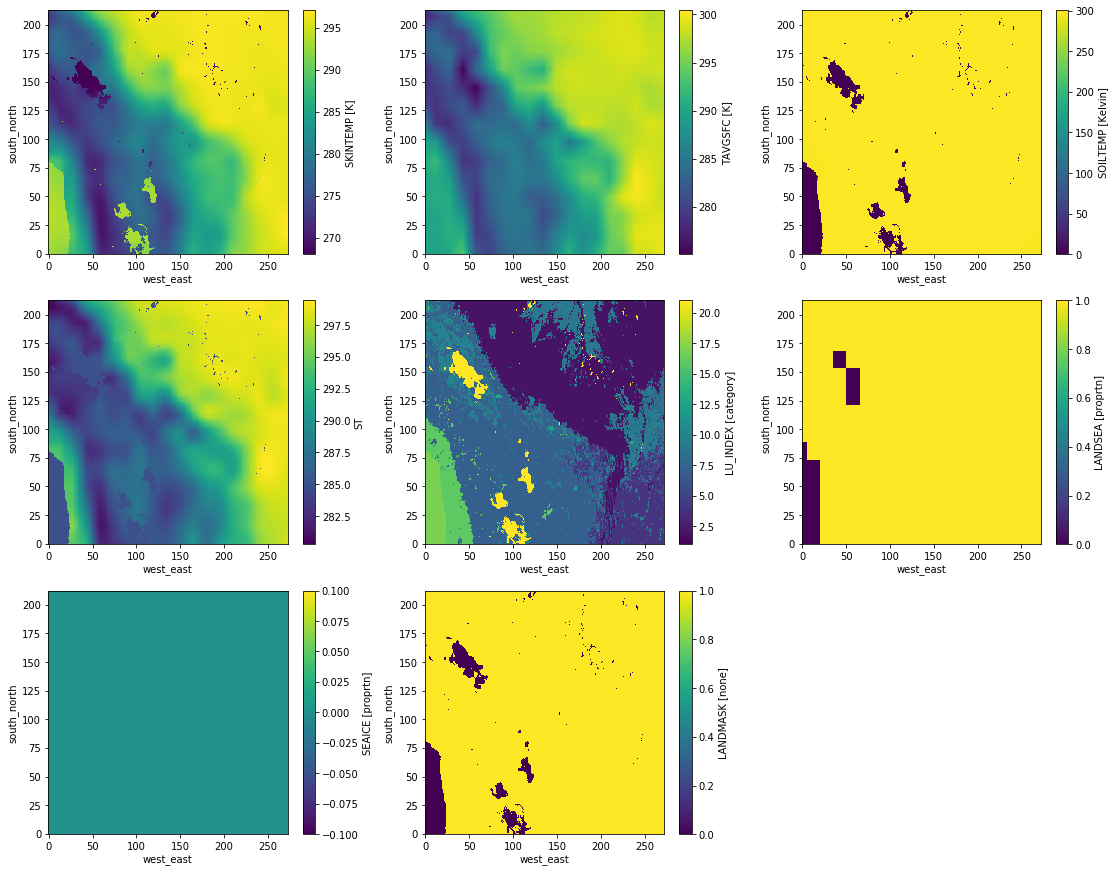

In [81]:
cols = [
    'SKINTEMP','TAVGSFC','SOILTEMP',
    'ST','LU_INDEX','LANDSEA','SEAICE','LANDMASK'
]
skim = ['ST']
ar = xr.open_dataset(p)
lcols = len(cols)
fx, fy = 3, 10
ic = 4
fig = plt.figure(1,figsize=(ic*fx * (1.3),ic*fy))
for i in range(lcols):
    col = cols[i]
    ax = fig.add_subplot(fy,fx,i+1)
    to_pl=ar[col]
    if col in skim:
        to_pl=to_pl[0][0]
    to_pl.plot(ax=ax)
fig.set_tight_layout('pad')
import warnings
warnings.filterwarnings('ignore')

In [36]:
list(ar.variables)

['Times',
 'PRES',
 'SOIL_LAYERS',
 'SM',
 'ST',
 'GHT',
 'PMSL',
 'SNOW',
 'SKINTEMP',
 'SOILHGT',
 'LANDSEA',
 'SEAICE',
 'ST100200',
 'ST040100',
 'ST010040',
 'ST000010',
 'SM100200',
 'SM040100',
 'SM010040',
 'SM000010',
 'PSFC',
 'RH',
 'VV',
 'UU',
 'TT',
 'TAVGSFC',
 'VAR_SSO',
 'OL4',
 'OL3',
 'OL2',
 'OL1',
 'OA4',
 'OA3',
 'OA2',
 'OA1',
 'VAR',
 'CON',
 'SNOALB',
 'LAI12M',
 'GREENFRAC',
 'ALBEDO12M',
 'SCB_DOM',
 'SOILCBOT',
 'SCT_DOM',
 'SOILCTOP',
 'SOILTEMP',
 'HGT_M',
 'LU_INDEX',
 'LANDUSEF',
 'COSALPHA_V',
 'SINALPHA_V',
 'COSALPHA_U',
 'SINALPHA_U',
 'XLONG_C',
 'XLAT_C',
 'LANDMASK',
 'COSALPHA',
 'SINALPHA',
 'F',
 'E',
 'MAPFAC_UY',
 'MAPFAC_VY',
 'MAPFAC_MY',
 'MAPFAC_UX',
 'MAPFAC_VX',
 'MAPFAC_MX',
 'MAPFAC_U',
 'MAPFAC_V',
 'MAPFAC_M',
 'CLONG',
 'CLAT',
 'XLONG_U',
 'XLAT_U',
 'XLONG_V',
 'XLAT_V',
 'XLONG_M',
 'XLAT_M']

In [75]:
ar

<xarray.Dataset>
Dimensions:      (Time: 1, num_metgrid_levels: 38, num_sm_layers: 4, num_st_layers: 4, south_north: 213, south_north_stag: 214, west_east: 273, west_east_stag: 274, z-dimension0012: 12, z-dimension0016: 16, z-dimension0021: 21)
Dimensions without coordinates: Time, num_metgrid_levels, num_sm_layers, num_st_layers, south_north, south_north_stag, west_east, west_east_stag, z-dimension0012, z-dimension0016, z-dimension0021
Data variables:
    Times        (Time) |S19 ...
    PRES         (Time, num_metgrid_levels, south_north, west_east) float32 ...
    SOIL_LAYERS  (Time, num_st_layers, south_north, west_east) float32 ...
    SM           (Time, num_sm_layers, south_north, west_east) float32 ...
    ST           (Time, num_st_layers, south_north, west_east) float32 ...
    GHT          (Time, num_metgrid_levels, south_north, west_east) float32 ...
    PMSL         (Time, south_north, west_east) float32 ...
    SNOW         (Time, south_north, west_east) float32 ...
    S